**Let's check the files we have on the machine?**

In [1]:
%ls

1_merge_pear.sh
2a_preparing_tags_LCPI.pl
2b_demulti_dual_index_linked.sh
3_tag_primer_clipping_clean_derep.sh
4_clustering_swarm_with_chim_filter.sh
5_BLAST_options.sh
6a_OTU_contingency_table.py
6a_build_OTU_table.sh
6b_filter_OTU_table.sh
DB1_NCBI_download_refs.sh
DB2_primers_cut.sh
DB3_NCBI_lineage.sh
Install_Setup.ipynb
NCBI_lineage_dups.pl
NCBI_lineage_edit.pl
README.md
count_fastq_sequences.sh
dioscorea.png
discorea.png
metapipe-r.ipynb
metapipe-run.ipynb
nucl_gb.accession2taxid.gz
r-4.0.5_1_amd64.deb
rstudio-workbench-2021.09.0-351.pro6-amd64.deb
taxdb.btd
taxdb.bti
taxdb.tar.gz
trnL_S1_L001_R1_001_sub.fastq
trnL_S1_L001_R2_001_sub.fastq
trnL_sub_metadata.txt
trnL_sub_tags.txt


**Let's make all the scripts executable**

In [120]:
!chmod 777 -R *.sh *.py *.pl

**A custom script called `DB1_NCBI_download_refs.sh` has been made available in the machine. Let's check how it is used?**

In [14]:
!bash DB1_NCBI_download_refs.sh -h

##################################################
 
DOWNLOAD NCBI SEQUENCES
 
Usage: DB1_NCBI_download_refs.sh [-n taxon name] [-t taxonid] [-m marker]
-n     target taxon name, e.g. Arachnida
-t     NCBI Taxonomy ID, e.g txid6854
-m     marker, e.g. COI, ITS, ITS1, ITS2, trnL, rbcL, matK...
-h     print this help
srun --ntasks=1 --mem-per-cpu=8G --time=02:00:00 --qos=devel --account=nn9813k --pty bash -i
make sure that '--account=nn9813k' is your user project!
 
##################################################


**As seen above, the script could be used as: `./DB1_NCBI_download_refs.sh -n Streptophyta -t txid35493 -m trnL` to download the trnL marker of all Streptophyta.**

**However this command takes to long, thus its resulting file has already been made available for download:**

In [15]:
%%bash
# ./DB1_NCBI_download_refs.sh -n Streptophyta -t txid35493 -m trnL
gsutil copy gs://metapipe-data/Streptophyta_trnL_NCBI.fasta .

Copying gs://metapipe-data/Streptophyta_trnL_NCBI.fasta...
/ [1 files][ 29.9 MiB/ 29.9 MiB]                                                
Operation completed over 1 objects/29.9 MiB.                                     


In [ ]:
%ls

1_merge_pear.sh*
2a_preparing_tags_LCPI.pl*
2b_demulti_dual_index_linked.sh*
3_tag_primer_clipping_clean_derep.sh*
4_clustering_swarm_with_chim_filter.sh*
5_BLAST_options.sh*
6a_OTU_contingency_table.py*
6a_build_OTU_table.sh*
6b_filter_OTU_table.sh*
DB1_NCBI_download_refs.sh*
DB2_primers_cut.sh*
DB3_NCBI_lineage.sh*
Install_Setup.ipynb
NCBI_lineage_dups.pl*
NCBI_lineage_edit.pl*
README.md
Streptophyta_trnL_NCBI.fasta
count_fastq_sequences.sh*
dioscorea.png
discorea.png
metapipe-r.ipynb
metapipe-run.ipynb
nucl_gb.accession2taxid.gz
r-4.0.5_1_amd64.deb
rstudio-workbench-2021.09.0-351.pro6-amd64.deb
taxdb.btd
taxdb.bti
taxdb.tar.gz
trnL_S1_L001_R1_001_sub.fastq
trnL_S1_L001_R2_001_sub.fastq
trnL_sub_metadata.txt
trnL_sub_tags.txt


**After downloading the file, we must remove the primer sequences. For that, we can use the following script:**

In [12]:
!bash DB2_primers_cut.sh -h

##################################################
CUT THE REFERENCES SEQUENCES ACCORDING YOUR PRIMERS PAIR
##################################################
 
Usage: DB2_primers_cut.sh [-r reference_dataset.fasta] [-F primer forwad] [-R primer reverse] [-p prefix]
-r     references fasta file downloaded
-F     primer forward
-R     primer reverse
-p     prefix for primer pair
-h     print this help
 
##################################################


In [13]:
%%bash
./DB2_primers_cut.sh \
    -r Streptophyta_trnL_NCBI.fasta \
    -F GGGCAATCCTGAGCCAA \
    -R CCATTGAGTCTCTGCACCTATC \
    -p target_trnL

This is cutadapt 3.5 with Python 3.7.12
Command line parameters: --discard-untrimmed -g GGGCAATCCTGAGCCAA -a CCATTGAGTCTCTGCACCTATC Streptophyta_trnL_NCBI.fasta
Processing reads on 1 core in single-end mode ...
Finished in 1.54 s (44 µs/read; 1.37 M reads/minute).

=== Summary ===

Total reads processed:                  35,200
Reads with adapters:                    25,609 (72.8%)

== Read fate breakdown ==
Reads discarded as untrimmed:            9,591 (27.2%)
Reads written (passing filters):        25,609 (72.8%)

Total basepairs processed:    25,675,178 bp
Total written (filtered):     16,997,938 bp (66.2%)

=== Adapter 1 ===

Sequence: GGGCAATCCTGAGCCAA; Type: regular 5'; Length: 17; Trimmed: 23520 times

Minimum overlap: 3
No. of allowed errors:
1-9 bp: 0; 10-17 bp: 1

Overview of removed sequences
length	count	expect	max.err	error counts
3	485	550.0	0	485
4	120	137.5	0	120
5	5	34.4	0	5
6	11	8.6	0	11
7	34	2.1	0	34
8	122	0.5	0	122
9	97	0.1	0	97
10	213	0.0	1	198 15
11	296	0.0	1	293

In [16]:
%ls -t | head

metapipe-run.ipynb
Streptophyta_trnL_NCBI.fasta
target_trnL_cutted_references.fasta
Install_Setup.ipynb
trnL_sub_tags.txt
trnL_S1_L001_R2_001_sub.fastq
trnL_S1_L001_R1_001_sub.fastq
trnL_sub_metadata.txt
rstudio-workbench-2021.09.0-351.pro6-amd64.deb
r-4.0.5_1_amd64.deb


**Let's check how this data looks like?**

In [18]:
!head -n 4 target_trnL_cutted_references.fasta

>MT950540.1 Euphorbia gaillardotii isolate 14066 tRNA-Thr (trnT) gene, partial sequence; trnT-trnL intergenic spacer and tRNA-Leu (trnL) gene, complete sequence; and trnL-trnF intergenic spacer, partial sequence; chloroplast
ATCCTGTTTTCCGACAACAAAAAAAGTTCCATAAAGACAGAAAAAAAAGGATAGGTGCAGAGACTCAATGGAAGCTGTTCTAATAACTGAGGTTGACTGCGTTGCATTAGTAAAGTAAAGAAATCCTTCTGTCAAAACTCCAGAAAGGAGAAAGTAAAGGATAACCTATATATATACGTACTGAAATACTATCTCAAATGATTAATAGGGACCCGAATCCAGAATCCATATTTTTTTTTTATCTTTAATTTTTTTATCTTTCTATTTTTTCGATTTCTATATAGAAATAGAAAAAATTGTTTTCAATTGATTCCAAGTTGAGGAAAGGATTGAATATTAATTAATCAAACCATTCACTTCATAGTCTGATAGATAAATGACTAATCGGGCGAGAATAAAGATAGAGTCCCATTCTACCTGTCAATATCGACAACAAGGAAATTTATAGTAAGAGGAAAATCCGTCGACTTTAGAAATCGTGAGGGTTCAAGTCCCTCTATCCCCAAAAAAGGACGGCTCGGCTCCTTAATTCGTTTTATCCCATTCTCTCGTTTCGTTAACGGTTCAAATTTCGTTATGTTTCTCACTCATTCTATTCTTTTACAAACATATTTGGGCTGGATTTATTTTCCCAAATCTTGGGATAGATATGATACACCTATAAATGCCCATCTTTGGGCAAAACAACAAATTCCATTTCATTGGAAATTGAAATGATTAACAATCCAAATCATTATTCGAATTGAAAATTACGAAGTTCTTTTTTTTTTTTTAA

**How to select a single sequence?**

In [19]:
!grep -A 20 "MT950540.1" Streptophyta_trnL_NCBI.fasta

>MT950540.1 Euphorbia gaillardotii isolate 14066 tRNA-Thr (trnT) gene, partial sequence; trnT-trnL intergenic spacer and tRNA-Leu (trnL) gene, complete sequence; and trnL-trnF intergenic spacer, partial sequence; chloroplast
GCTCGCATAACAGCAATTTTACATGCATAGGAATTTAATAAACTAATGGAATCTTGGCTATTAACTTTTT
ACTTTTTATTCTTTTTCGTTATTCAGAATTACTTATAAATAACGAAAAAAAAGAAAAGGAATCGATCCTT
CGAGTATTCAAAATTGCACGAGAAAAAATTAGAGTAAGAGAAGTAGATATAATAAATGTGTTCTATATAC
ATCTATATTGAATTGCGGATAGAGAAATGATAGAATCCTTTCTGATTAGACTAAAGAAGGGTCTCTGCTA
GAGATGAAAGAAGATAGCCAAGAAATAAAAAAGAAAGACTTTTTCTAGGAATCAGTATCTAATGACTTCA
ACAGGTCCAGTAGAATAGAAATGAAAAAGGGGGATAATAATAAGATCTTAATCTCAAAGCAAAAAAGGGG
ATATGGCGAAATTGGTAGACGCTACGGACTTAATTGGATTGAGCCTTGGTATGGAAACTTACTAAGTGAT
AACTTTCAAATTCAGAGAAACCCTGGAATTAAAAATGGGCAATCCTGAGCCAAATCCTGTTTTCCGACAA
CAAAAAAAGTTCCATAAAGACAGAAAAAAAAGGATAGGTGCAGAGACTCAATGGAAGCTGTTCTAATAAC
TGAGGTTGACTGCGTTGCATTAGTAAAGTAAAGAAATCCTTCTGTCAAAACTCCAGAAAGGAGAAAGTAA
AGGATAACCTATATATATACGTACTGAAATACTATCTCAAATGATTAATAGGGACCCGAATCCAG

**Let's begin to format our sequences to properly create a local BLAST database**

In [20]:
!bash DB3_NCBI_lineage.sh -h

##################################################
 
Format and include taxonomic lineage in the NCBI reference fasta.
This script edit the headers from the reference multifasta file,
in order to build your local database to run BLAST.

Usage: DB3_NCBI_lineage.sh [-r NCBI_references.fasta] [-p output_prefix]
-r     references fasta file
-p     prefix to output filenames (e.g ITS_NCBI)
-h     Print this Help.

This script needs the two embedded Perl scripts to run:
NCBI_lineage_dups.pl and NCBI_lineage_edit.pl
DO NOT EDIT THEM.
Use srun or run_NCBI_lineage.slurm
srun --ntasks=1 --mem-per-cpu=8G --time=02:00:00 --qos=devel --account=nn9813k --pty bash -i
make sure that '--account=nn9813k' is your user project!
 
##################################################


In [21]:
%%bash
./DB3_NCBI_lineage.sh -r target_trnL_cutted_references.fasta -p target_trnL

ATTENTION: original NCBI reference sequences:
>LC384553.1 Scutellaria orientalis genes for 18S rRNA and ITS1...
TGAACCATCGAGTCTTTGAACGCAAGTTGCGCCCGAACCCATCAGGCCGAGGGCAC...
Presenting the accession.version, a white-space and the complete
description [TI esearch field]
 
FILES CHECK UP:
nucl_gb.accession2taxid.gz ... OK
taxdb ... OK
taxonkit NOT FOUND.
NCBI_lineage_edit.pl and NCBI_lineage_dups.pl ... OK
Output filename: target_trnL.uniq.fasta
References file: target_trnL_cutted_references.fasta
extracting accession code from NCBI references...
25609 ./tmp.KbNnzjbbE3 accession codes extracted:
MT950540.1
MT950539.1
MT950538.1
...
Parsing accession to taxid...
Parsing accession/taxid to lineage...
removing NCBI sequences header, linearizing sequences...
joining edited lineage file with linearized sequences...
removing sequence duplicates...


23:56:42.884 [WARN] taxid 2769409 was deleted
23:56:42.884 [WARN] taxid 2769409 was deleted
23:56:42.887 [WARN] taxid 2896462 was deleted
23:56:42.889 [WARN] taxid 2896453 was deleted
23:56:42.890 [WARN] taxid 2896453 was deleted
23:56:42.890 [WARN] taxid 2896453 was deleted
23:56:42.890 [WARN] taxid 2896453 was deleted
23:56:42.890 [WARN] taxid 2896453 was deleted
23:56:42.890 [WARN] taxid 2896453 was deleted
23:56:42.890 [WARN] taxid 2896453 was deleted
23:56:42.890 [WARN] taxid 2896453 was deleted
23:56:42.890 [WARN] taxid 2896453 was deleted
23:56:42.890 [WARN] taxid 2896453 was deleted
23:56:42.890 [WARN] taxid 2896453 was deleted
23:56:42.890 [WARN] taxid 2896453 was deleted
23:56:42.890 [WARN] taxid 2896453 was deleted
23:56:54.312 [WARN] taxid 2769409 was deleted
23:56:54.312 [WARN] taxid 2769409 was deleted
23:56:54.336 [WARN] taxid 2896462 was deleted
23:56:54.336 [WARN] taxid 2896453 was deleted
23:56:54.336 [WARN] taxid 2896453 was deleted
23:56:54.336 [WARN] taxid 2896453 

**Let's see how it went**

In [22]:
!tail target_trnL.log

Parsing accession/taxid to lineage...
removing NCBI sequences header, linearizing sequences...
joining edited lineage file with linearized sequences...
removing sequence duplicates...
Total number of original NCBI downloaded sequences: 25609
Total of accession codes extracted: 25609 ./tmp.KbNnzjbbE3
Total accession + taxid joined: 25609 ./tmp.ysowKvDF0o
Total lineage headers formatted: 25608 ./tmp.sIJEI0BQGy
25608 sequences with lineage headers were succesfully formatted.
A total of 10249 duplicates were removed, remaining 15359 final sequences.


In [27]:
!head target_trnL.uniq.fasta

>AB353416.1 Eukaryota|Streptophyta|Magnoliopsida|Poales|Poaceae|Echinochloa|Echinochloa+crus-galli
ATCCCTTTTTTGAAAAAACAAGTGGTTCTCAAACTAGAACCCAAAAGAAAAGGATAGGTG
CAGAGACTCAATGGAAGTTGTTCTAACGAATCGAAGTAATTACGTTGTGTTGGTAGTGGA
ACTCCCTCGAAATTAGAGAAAGAAGGGCTTTATACATATAATACACACGTATAGATACTG
ACATAGCAAACGATTAATCACGGAACCCATATCATAATATAGGTTCTTTATTTGATTTTT
TTTAGAATGAAATTTGGAATGATTATGAAATAGAAAATTCTGAATTTTTTTAGAATTATT
GTGAATCCATTCCAATCGAATATTGAGTAATCAAATCCTTCAATTCATTGTTTTCGAGAT
CTTTACTTTTAAAAAGTGGATTAATCGAACGAGGATAAAGAGAGAGTCCCATTCTACATG
TCAATACTGACAACAATGAAATT
>AB353418.1 Eukaryota|Streptophyta|Magnoliopsida|Poales|Poaceae|Echinochloa|Echinochloa+colona


In [28]:
%ls | head

1_merge_pear.sh*
2a_preparing_tags_LCPI.pl*
2b_demulti_dual_index_linked.sh*
3_tag_primer_clipping_clean_derep.sh*
4_clustering_swarm_with_chim_filter.sh*
5_BLAST_options.sh*
6a_OTU_contingency_table.py*
6a_build_OTU_table.sh*
6b_filter_OTU_table.sh*
DB1_NCBI_download_refs.sh*


**Now we will start to work if our sequencing data. First we will merge read pairs with PEAR. Let's check how it is used?**

In [29]:
!bash 1_merge_pear.sh -h

##################################################
 
Merging of paired end fastq files from Illumina sequencing using Pear.
 
Usage: 1_merge_pear.sh [-f R1.fq] [-r R2.fq] [-o output] [-p 0.001] [-s 20] [-t 4]
-f     R1.fastq original file
-r     R2.fastq original file
-o     output name for the assembled fastq file
-p     p-value: statistical test for true assembly. Lower p-value means less possibility of overlapping by chance. Options are: 0.0001, 0.001, 0.01, 0.05 and 1.0
-s     minimum overlap size.
-t     threads
-h     print this help
 
##################################################


**Now we run it**

In [70]:
%%bash
# aqui ajeitei o nome para o novo nome com "_sub"
./1_merge_pear.sh \
    -f trnL_S1_L001_R1_001_sub.fastq \
    -r trnL_S1_L001_R2_001_sub.fastq \
    -o trnL_sub \
    -p 0.001 \
    -s 20 \
    -t 4

 ____  _____    _    ____ 
|  _ \| ____|  / \  |  _ \
| |_) |  _|   / _ \ | |_) |
|  __/| |___ / ___ \|  _ <
|_|   |_____/_/   \_\_| \_\

PEAR v0.9.6 [January 15, 2015]

Citation - PEAR: a fast and accurate Illumina Paired-End reAd mergeR
Zhang et al (2014) Bioinformatics 30(5): 614-620 | doi:10.1093/bioinformatics/btt593

Forward reads file.................: trnL_S1_L001_R1_001_sub.fastq
Reverse reads file.................: trnL_S1_L001_R2_001_sub.fastq
PHRED..............................: 33
Using empirical frequencies........: YES
Statistical method.................: OES
Maximum assembly length............: 999999
Minimum assembly length............: 50
p-value............................: 0.001000
Quality score threshold (trimming).: 20
Minimum read size after trimming...: 1
Maximal ratio of uncalled bases....: 0.000000
Minimum overlap....................: 20
Scoring method.....................: Scaled score
Threads............................: 4

Allocating memory.................

In [71]:
%ls -lat | head

total 2554660
drwxr-xr-x  8 jupyter jupyter       4096 Dec 10 00:43 .git/
drwxr-xr-x  7 jupyter jupyter       4096 Dec 10 00:43 ./
-rw-r--r--  1 jupyter jupyter     117094 Dec 10 00:43 metapipe-run.ipynb
-rw-r--r--  1 jupyter jupyter     314854 Dec 10 00:43 trnL_sub.assembled.fastq
-rw-r--r--  1 jupyter jupyter       1084 Dec 10 00:43 trnL_sub.discarded.fastq
-rw-r--r--  1 jupyter jupyter          0 Dec 10 00:43 trnL_sub.unassembled.forward.fastq
-rw-r--r--  1 jupyter jupyter          0 Dec 10 00:43 trnL_sub.unassembled.reverse.fastq
drwxr-xr-x  2 jupyter jupyter       4096 Dec 10 00:38 dereplicated/
-rw-r--r--  1 jupyter jupyter      14018 Dec 10 00:38 trnL_sub.qual


**Let's check how this data looks like and the tags for each family"**

In [72]:
!head trnL_sub.assembled.fastq

@M02980:420:000000000-G84WN:1:2101:3414:10035 1:N:0:GTCTACAC+GCCAAGGT
TGTTGCGTTTCTGGGCAATCCTGAGCCAAATCCTGTTTTATTAAAACAAACAAGGGTTTCATAAACCGAGAATAAAAAAGGATAGGTGCAGAGACTCAATGGGGGCATCTTACG
+
IIIIIIIIIIIIII4IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIFIIIIIIIIIIIFIIIIIIIICIIIIIIII
@M02980:420:000000000-G84WN:1:1102:14365:7465 1:N:0:GTCTACAC+GCCAAGGT
ATCTAGTGGCAAGGGCAATCCTGAGCCAAATCCTCTTCTCTTTTCCAAGAACAAACAGGGGTTCAGAAAGCGAAAAAGGGGGATAGGTGCAGAGACTCAATGGAGAAACGCAACA
+
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
@M02980:420:000000000-G84WN:1:1102:11364:2621 1:N:0:GTCTACAC+GCCAAGGT
ATAGTTAGGGCTGGGCAATCCTGAGCCAAATCCTGTTTTCAGAAAACAAGGGTTCAGAAAGCGAGAACCAAAAAAAGGATAGGATAGGTGCAGAGACTCAATGGCACCCTTAAAGT


**Since we will read tabular files multiple times in the notebook, let's create a function that loads the tabular file, with or without header**

In [32]:
def get_glimpse_head(in_file, n_lines=10, file_header=True, file_sep='\t'):
    import pandas as pd
    
    # read file
    if file_header == False:
        df = pd.read_csv(in_file, sep=file_sep, header=None).head(n_lines)
    else:
        df = pd.read_csv(in_file, sep=file_sep).head(n_lines)
    
    # return table
    return df

def get_glimpse_tail(in_file, n_lines=10, file_header=True, file_sep='\t'):
    import pandas as pd
    
    # read file
    if file_header == False:
        df = pd.read_csv(in_file, sep=file_sep, header=None).tail(n_lines)
    else:
        df = pd.read_csv(in_file, sep=file_sep).tail(n_lines)
    
    # return table
    return df

In [25]:
get_glimpse_tail('trnL_sub_tags.txt', file_header=False)

,0,1,2
24,Peoniasuffruticosa_a,CCATCACATAGG,TGCAGATCCAAC
25,Peoniasuffruticosa_b,GTGGTATGGGAG,TGCAGATCCAAC
26,Poriacocos_a,ATAGTTAGGGCT,CCTAAACTACGG
27,Poriacocos_b,GCACTTCATTTC,CCTAAACTACGG
28,Prunuspersica_a,ATGTCCGACCAA,TGCAGATCCAAC
29,Prunuspersica_b,ATCTAGTGGCAA,CCATCACATAGG
30,Trogopterusxanthipes_a,ATAGTTAGGGCT,TGTTGCGTTTCT
31,Trogopterusxanthipes_b,ACTTTAAGGGTG,CACCTTACCTTA
32,Negative,TGTTGCGTTTCT,GAGACTATATGC
33,NegativePCR,ATGTCCGACCAA,GAGACTATATGC


**Now let's prepare the barcode files**

In [74]:
%%bash 
perl 2a_preparing_tags_LCPI.pl trnL_sub_tags.txt linked

In [75]:
%ls -lat | head

total 2554664
-rw-r--r--  1 jupyter jupyter       3306 Dec 10 00:43 Barcodes_LA1.fa
-rw-r--r--  1 jupyter jupyter       3306 Dec 10 00:43 Barcodes_LA2.fa
-rw-r--r--  1 jupyter jupyter       3306 Dec 10 00:43 Barcodes_LA3.fa
drwxr-xr-x  8 jupyter jupyter       4096 Dec 10 00:43 .git/
drwxr-xr-x  7 jupyter jupyter       4096 Dec 10 00:43 ./
-rw-r--r--  1 jupyter jupyter     119338 Dec 10 00:43 metapipe-run.ipynb
-rw-r--r--  1 jupyter jupyter     314854 Dec 10 00:43 trnL_sub.assembled.fastq
-rw-r--r--  1 jupyter jupyter       1084 Dec 10 00:43 trnL_sub.discarded.fastq
-rw-r--r--  1 jupyter jupyter          0 Dec 10 00:43 trnL_sub.unassembled.forward.fastq


In [47]:
!tail Barcodes_LA1.fa

>Prunuspersica_b
^ATCTAGTGGCAA...CCATCACATAGG$
>Trogopterusxanthipes_a
^ATAGTTAGGGCT...TGTTGCGTTTCT$
>Trogopterusxanthipes_b
^ACTTTAAGGGTG...CACCTTACCTTA$
>Negative
^TGTTGCGTTTCT...GAGACTATATGC$
>NegativePCR
^ATGTCCGACCAA...GAGACTATATGC$


**Now we are able to demultiplex our data based on the barcodes**

In [78]:
%%bash
./2b_demulti_dual_index_linked.sh trnL_sub.assembled.fastq

./Glycyrrhizauralensis_a_LA.fq
./Linderaaggregata_a_LA.fq
./Glycyrrhizauralensis_b_LA.fq
./GXZYT_b_LA.fq
./Ligusticumchuanxiong_a_LA.fq
./Linderaaggregata_b_LA.fq
./Peoniasuffruticosa_b_LA.fq


**Let's check how the results are organised and what do they look like**

In [53]:
%ls -lat | head

total 2554320
drwxr-xr-x  8 jupyter jupyter       4096 Dec 10 00:18 .git/
drwxr-xr-x  5 jupyter jupyter       4096 Dec 10 00:18 ./
-rw-r--r--  1 jupyter jupyter     118650 Dec 10 00:18 metapipe-run.ipynb
drwxr-xr-x  2 jupyter jupyter       4096 Dec 10 00:18 demulti_linked_samples/
-rw-r--r--  1 jupyter jupyter       1653 Dec 10 00:16 Barcodes_LA1.fa
-rw-r--r--  1 jupyter jupyter       1653 Dec 10 00:16 Barcodes_LA2.fa
-rw-r--r--  1 jupyter jupyter       1653 Dec 10 00:16 Barcodes_LA3.fa
-rw-r--r--  1 jupyter jupyter     314854 Dec 10 00:15 trnL.assembled.fastq
-rw-r--r--  1 jupyter jupyter       1084 Dec 10 00:15 trnL.discarded.fastq


In [54]:
%ls demulti_linked_samples/ | head

Angelicaesinensis_a_LA.fq
Angelicaesinensis_b_LA.fq
Carthamustinctorius_a_LA.fq
Carthamustinctorius_b_LA.fq
Citrusaurantium_a_LA.fq
Citrusaurantium_b_LA.fq
Cyperusrotundus_a_LA.fq
Cyperusrotundus_b_LA.fq
GXZYT_a_LA.fq
GZFLW_a_LA.fq


In [79]:
!head demulti_linked_samples/Angelicaesinensis_a_LA.fq

@M02980:420:000000000-G84WN:1:2101:18903:19935 1:N:0:GTCTACAC+GCCAAGGT
caccttaccttaGGGCAATCCTGAGCCAAATTTTATTTTCCAAAAAAAAACAAAGGCCCAGAAGGTGAAAAAAGGATAGGTGCAGAGACTCAATGGcctatgtgatgg
+
IAIIIIFIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII?IIIIICIIIBIIII?III?IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIAIIIIIII
@M02980:420:000000000-G84WN:1:2103:29142:12753 1:N:0:GTCTACAC+GCCAAGGT
caccttaccttaGGGCAATCCTGAGCCAAATCTTATTTTCCAAAAACAAACAAAGGCCCAGAAGGTGAAAAAAGGATAGGTGCAGAGACTCAATGGcctatgtgatgg
+
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
@M02980:420:000000000-G84WN:1:1101:10374:13201 1:N:0:GTCTACAC+GCCAAGGT
caccttaccttaGGGCAATCCTGAGCCAAATCCTATTTTCCAAAAACAAACAAAGGCCCAGAAGGTGAAAAAAGGATAGGTGCAGAGACTCAATGGcctatgtgatgg


**Now let's count the amount of data available for each barcode**

In [80]:
%%bash
./count_fastq_sequences.sh demulti_linked_samples/*.fq > demulti_count_trnL.txt

In [28]:
!head demulti_count_trnL.txt

	demulti_linked_samples/Angelicaesinensis_a_LA.fq : 9
	demulti_linked_samples/Angelicaesinensis_b_LA.fq : 8
	demulti_linked_samples/Carthamustinctorius_a_LA.fq : 7
	demulti_linked_samples/Carthamustinctorius_b_LA.fq : 2
	demulti_linked_samples/Citrusaurantium_a_LA.fq : 1
	demulti_linked_samples/Citrusaurantium_b_LA.fq : 13
	demulti_linked_samples/Cyperusrotundus_a_LA.fq : 7
	demulti_linked_samples/Cyperusrotundus_b_LA.fq : 2
	demulti_linked_samples/GXZYT_a_LA.fq : 10
	demulti_linked_samples/GZFLW_a_LA.fq : 15


**Now we must clip the primers from our sequences**

In [57]:
!bash 3_tag_primer_clipping_clean_derep.sh -h

##################################################
TAGS AND PRIMERS CLIPPING
##################################################
get your primer's reverse complement in this website:
http://arep.med.harvard.edu/labgc/adnan/projects/Utilities/revcomp.html
 
Usage: 3_tag_primer_clipping_clean_derep.sh [-b tags file] [-F primer forwad] [-R primer reverse] [-f primer forward] [-r primer reverse] [-p prefix] [-l amplicon min length] [-d path to samples]
-b     original barcodes/tags file
-F     primer forward
-R     primer reverse
-f     reverse complement primer forward
-r     everse complement primer reverse
-p     prefix to quality file
-l     minimum length for clipped amplicon
-d     path to demultiplexed samples directory. Use pwd.
-h     print this help
 
##################################################


In [81]:
%%bash
./3_tag_primer_clipping_clean_derep.sh \
    -b trnL_sub_tags.txt \
    -F GGGCAATCCTGAGCCAA \
    -R CCATTGAGTCTCTGCACCTATC \
    -f TTGGCTCAGGATTGCCC \
    -r GATAGGTGCAGAGACTCAATGG \
    -p trnL_sub \
    -l 30 \
    -d /home/jupyter/METAPIPE_Workshop2021/demulti_linked_samples

**How are the results?**

In [67]:
%ls -lat | head

total 2554352
drwxr-xr-x  8 jupyter jupyter       4096 Dec 10 00:39 .git/
drwxr-xr-x  7 jupyter jupyter       4096 Dec 10 00:39 ./
-rw-r--r--  1 jupyter jupyter     119173 Dec 10 00:39 metapipe-run.ipynb
drwxr-xr-x  2 jupyter jupyter       4096 Dec 10 00:38 dereplicated/
-rw-r--r--  1 jupyter jupyter      14018 Dec 10 00:38 trnL_sub.qual
-rwxrwxrwx  1 jupyter jupyter       3906 Dec 10 00:38 3_tag_primer_clipping_clean_derep.sh*
drwxr-xr-x  2 jupyter jupyter       4096 Dec 10 00:38 .ipynb_checkpoints/
drwxr-xr-x  5 jupyter jupyter       4096 Dec 10 00:34 clip_out/
-rw-r--r--  1 jupyter jupyter       1431 Dec 10 00:19 demulti_count_trnL.txt


In [68]:
%ls clip_out/adapter_clip | head

*_trim1.fq
Angelicaesinensis_a_trim1.fq
Angelicaesinensis_b_trim1.fq
Carthamustinctorius_a_trim1.fq
Carthamustinctorius_b_trim1.fq
Citrusaurantium_a_trim1.fq
Citrusaurantium_b_trim1.fq
Cyperusrotundus_a_trim1.fq
Cyperusrotundus_b_trim1.fq
GXZYT_a_trim1.fq


In [41]:
!head -2 clip_out/adapter_clip/Angelicaesinensis_a_trim1.fq

@M02980:420:000000000-G84WN:1:1101:14746:1924 1:N:0:GTCTACAC+GCCAAGGT
CCATTGAGTCTCTGCACCTATCCCCTTCCTATCTTAGGAGAAGAAACATTGTCTTCATGAACCGGATTTGGCTCAGGATTGCCC


In [42]:
%ls clip_out/primer_clip | head

Angelicaesinensis_a_trim2.fq
Angelicaesinensis_b_trim2.fq
Carthamustinctorius_a_trim2.fq
Carthamustinctorius_b_trim2.fq
Citrusaurantium_a_trim2.fq
Citrusaurantium_b_trim2.fq
Cyperusrotundus_a_trim2.fq
Cyperusrotundus_b_trim2.fq
GXZYT_a_trim2.fq
GXZYT_b_trim2.fq


In [83]:
!head -2 clip_out/primer_clip/Angelicaesinensis_a_trim2.fq

@M02980:420:000000000-G84WN:1:2101:18903:19935 1:N:0:GTCTACAC+GCCAAGGT
ATTTTATTTTCCAAAAAAAAACAAAGGCCCAGAAGGTGAAAAAAG


In [84]:
# ajeitei aqui a escolha da leitura -- estava escolhendo uma que não tinha no subsample
!grep -A 1 "@M02980:420:000000000-G84WN:1:2101:18903:19935 1:N:0:GTCTACAC+GCCAAGGT" trnL_sub.assembled.fastq

@M02980:420:000000000-G84WN:1:2101:18903:19935 1:N:0:GTCTACAC+GCCAAGGT
CACCTTACCTTAGGGCAATCCTGAGCCAAATTTTATTTTCCAAAAAAAAACAAAGGCCCAGAAGGTGAAAAAAGGATAGGTGCAGAGACTCAATGGCCTATGTGATGG


<p>We can see here the tags in lowercase.&nbsp;</p>
<p>As you can see in the mapping file, the 5&apos; tag is in forward direction <strong>caccttacctta</strong>, and the 3&apos; tag is the reverse complement of the reverse tag <strong>cctatgtgatgg&nbsp;</strong>(prom R2 pair-end read), configuring the tags orientation found in the <strong>Barcodes_LA3.fa</strong> file, which is the most common tag orientation in <strong>merged Illumina paired-end reads</strong>.</p>
<p>Right after the tags in lowercase, we can see the the <strong>3&apos; primer in forward direction</strong> CCATTGAGTCTCTGCACCTATC, the <strong>amplicon </strong>and the <strong>5&apos; primer in reverse direction</strong>.</p>

In [29]:
get_glimpse_head('trnL_sub_tags.txt', file_header=False)

,0,1,2
0,Angelicaesinensis_a,CACCTTACCTTA,CCATCACATAGG
1,Angelicaesinensis_b,ACTTTAAGGGTG,CCATCACATAGG
2,Carthamustinctorius_a,ACTTTAAGGGTG,GAGCAACATCCT
3,Carthamustinctorius_b,TGTTGCGTTTCT,GAGCAACATCCT
4,Citrusaurantium_a,GAGACTATATGC,GAGCAACATCCT
5,Citrusaurantium_b,ATCTAGTGGCAA,TGTTGCGTTTCT
6,Cyperusrotundus_a,ATAGTTAGGGCT,ACTTTAAGGGTG
7,Cyperusrotundus_b,GAGACTATATGC,ACTTTAAGGGTG
8,Glycyrrhizauralensis_a,CCAGGGACTTCT,ACTTTAAGGGTG
9,Glycyrrhizauralensis_b,ACTTTAAGGGTG,GAGACTATATGC


In [86]:
%ls clip_out/trimming | head

*_trim3.fq
Angelicaesinensis_a_trim3.fq
Angelicaesinensis_b_trim3.fq
Carthamustinctorius_a_trim3.fq
Carthamustinctorius_b_trim3.fq
Citrusaurantium_a_trim3.fq
Citrusaurantium_b_trim3.fq
Cyperusrotundus_a_trim3.fq
Cyperusrotundus_b_trim3.fq
GXZYT_a_trim3.fq


In [87]:
!head -2 clip_out/trimming/Angelicaesinensis_a_trim3.fq

@8a0463ffc82180601c34f944414e83488ecd6c41;ee=0.0079
ATTTTATTTTCCAAAAAAAAACAAAGGCCCAGAAGGTGAAAAAAG


In [88]:
%ls dereplicated | head

*_dp.fasta
Angelicaesinensis_a_dp.fasta
Angelicaesinensis_b_dp.fasta
Carthamustinctorius_a_dp.fasta
Carthamustinctorius_b_dp.fasta
Citrusaurantium_a_dp.fasta
Citrusaurantium_b_dp.fasta
Cyperusrotundus_a_dp.fasta
Cyperusrotundus_b_dp.fasta
GXZYT_a_dp.fasta


In [49]:
!head -2 dereplicated/Angelicaesinensis_a_dp.fasta

>addff39eca064dd9caa294721e6a23cab9c331ab;size=11061
ATCCTATTTTCCAAAAACAAACAAAGGCCCAGAAGGTGAAAAAAG


**Let's check the distribuition of the qualities?**

Text(5.334999999999994, 0.5, 'Distribution of qualities')

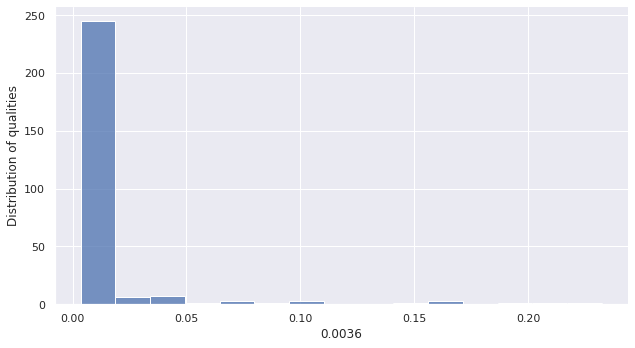

In [31]:
# Import the necessary modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize the lists for X and Y
data = pd.read_csv('trnL_sub.qual', sep='\t')

df = pd.DataFrame(data)

# distribution based on column 2 from file
dist_plot = sns.displot(df.iloc[:, 1], bins=15)

# show plot with custom width
dist_plot.fig.set_figwidth(10)
plt.ylabel("Distribution of qualities")

**How about dereplicating and clustering our data?**

In [111]:
%%bash
./4_clustering_swarm_with_chim_filter.sh trnL /home/jupyter/METAPIPE_Workshop2021/dereplicated

vsearch v2.18.0_linux_x86_64, 14.7GB RAM, 4 cores
https://github.com/torognes/vsearch

Dereplicating file ./tmp.OOoNUVhM08 100%
19847 nt in 333 seqs, min 36, max 114, avg 60
Sorting 100%
274 unique sequences, avg cluster 3.6, median 1, max 75
Writing output file 100%
Swarm 3.0.0
Copyright (C) 2012-2019 Torbjorn Rognes and Frederic Mahe
https://github.com/torognes/swarm

Mahe F, Rognes T, Quince C, de Vargas C, Dunthorn M (2014)
Swarm: robust and fast clustering method for amplicon-based studies
PeerJ 2:e593 https://doi.org/10.7717/peerj.593

Mahe F, Rognes T, Quince C, de Vargas C, Dunthorn M (2015)
Swarm v2: highly-scalable and high-resolution amplicon clustering
PeerJ 3:e1420 https://doi.org/10.7717/peerj.1420

CPU features:      mmx sse sse2 sse3 ssse3 sse4.1 sse4.2 popcnt avx avx2
Database file:     -
Output file:       trnL_cluster_tmp.swarms
Statistics file:   trnL_cluster_tmp.stats
Resolution (d):    1
Threads:           8
Break OTUs:        Yes
Fastidious:        Yes, with boun

**Let's check what was produced?**

In [112]:
%ls -lat | head

total 2554768
drwxr-xr-x  8 jupyter jupyter       4096 Dec 10 01:08 .git/
drwxr-xr-x  8 jupyter jupyter       4096 Dec 10 01:08 ./
-rw-r--r--  1 jupyter jupyter     127463 Dec 10 01:08 metapipe-run.ipynb
drwxr-xr-x  2 jupyter jupyter       4096 Dec 10 01:08 .ipynb_checkpoints/
drwxr-xr-x  2 jupyter jupyter       4096 Dec 10 01:07 chimera_out/
-rw-r--r--  1 jupyter jupyter       9277 Dec 10 01:07 trnL_cluster_representatives.uchime
-rw-r--r--  1 jupyter jupyter       5152 Dec 10 01:07 trnL_cluster.stats
-rw-r--r--  1 jupyter jupyter      13177 Dec 10 01:07 trnL_cluster.swarms
-rw-r--r--  1 jupyter jupyter      10391 Dec 10 01:07 trnL_cluster_representatives.fas


In [113]:
!head -4 trnL_cluster_representatives.fas

>8cdbd592419bf9c65aa2691a6c163fe4c16042bb;size=87;
ATCCTGTTTTCCGAAAACAAACACAAAGATTCAGAAAGCAAGAATAAAAAAG
>a84c749701d67d1226018c6714b72e543a618f16;size=69;
CTTTTTTTATATAAAAAAAAATTTTATAATATAATAAAAAATTTAGAATAATAATATTCTATATATATTATATATTTTTTTATATTTTTTCAAAATAATGAT


In [114]:
!head -4 trnL_cluster_representatives2blast.fas

>8cdbd592419bf9c65aa2691a6c163fe4c16042bb_87
ATCCTGTTTTCCGAAAACAAACACAAAGATTCAGAAAGCAAGAATAAAAAAG
>a84c749701d67d1226018c6714b72e543a618f16_69
CTTTTTTTATATAAAAAAAAATTTTATAATATAATAAAAAATTTAGAATAATAATATTCTATATATATTATATATTTTTTTATATTTTTTCAAAATAATGAT


In [33]:
get_glimpse_head('trnL_cluster.stats', file_header=False, n_lines=4)

,0,1,2,3,4,5,6
0,10,87,8cdbd592419bf9c65aa2691a6c163fe4c16042bb,75,6,1,1
1,13,59,addff39eca064dd9caa294721e6a23cab9c331ab,47,12,1,1
2,14,58,967e951648145482fcc47f85b2a3530bec26d552,44,12,1,1
3,12,55,9cb16aaf5f7887b597ac5fc1bba7e95e881b0d3c,44,11,2,2


In [34]:
get_glimpse_head('trnL_cluster_representatives.uchime', file_header=False, n_lines=4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,8cdbd592419bf9c65aa2691a6c163fe4c16042bb;size=87;,*,*,*,*,*,*,*,*,0,0,0,0,0,0,*,N
1,0.0,a84c749701d67d1226018c6714b72e543a618f16;size=69;,*,*,*,*,*,*,*,*,0,0,0,0,0,0,*,N
2,0.0,addff39eca064dd9caa294721e6a23cab9c331ab;size=59;,*,*,*,*,*,*,*,*,0,0,0,0,0,0,*,N
3,0.0,967e951648145482fcc47f85b2a3530bec26d552;size=58;,*,*,*,*,*,*,*,*,0,0,0,0,0,0,*,N


**Finally here, let's perform a BLAST alignment of our representative clusters against our target_trnL file?**

In [116]:
!bash 5_BLAST_options.sh -h

##################################################
BLAST alignment against custom or NCBI NT local database.
 
Usage: 5_BLAST_options.sh [-f fasta] [-d database] [-s float] [-c float] [-t treads] [-o output]
-f     representative OTUs multifasta from clustering step
-d     database to align against: 'NT' or 'My_refs.uniq.fasta'
-s     minimum similarity between query and subject, float 0-1
-c     minimum subject coverage reached by the query alignment, float 0-1
-t     number of threads:
           custom database: 2 threads for each 1000 seqs.
           NCBI NT database: 4 threads for each 1000 seqs.
-o     output name: 'name'_local_blast.tab
-h     print this help
 
##################################################


In [130]:
%%bash
./5_BLAST_options.sh \
    -f trnL_cluster_representatives2blast.fas \
    -d target_trnL.uniq.fasta -s 0.95 -c 0.5 -t 4 -o target95_trnL



Building a new DB, current time: 12/10/2021 01:52:49
New DB name:   /home/jupyter/METAPIPE_Workshop2021/target_trnL.uniq.fasta
New DB title:  target_trnL.uniq.fasta
Sequence type: Nucleotide
Deleted existing Nucleotide BLAST database named /home/jupyter/METAPIPE_Workshop2021/target_trnL.uniq.fasta
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 15359 sequences in 0.511018 seconds.




./5_BLAST_options.sh: 59: [: target_trnL.uniq.fasta: unexpected operator
./5_BLAST_options.sh: 59: [: target_trnL.uniq.fasta: unexpected operator


> Marcele, aqui é necessário este comando do update_blastdb?

In [131]:
!update_blastdb.pl --decompress nr

Connected to GCP
^C


In [133]:
%ls -lat | head

total 4676052
drwxr-xr-x  8 jupyter jupyter       4096 Dec 10 01:58 ./
-rw-r--r--  1 jupyter jupyter          0 Dec 10 01:58 metapipe-run.ipynb
drwxr-xr-x  8 jupyter jupyter       4096 Dec 10 01:57 .git/
-rw-r--r--  1 jupyter jupyter      19616 Dec 10 01:53 Install_Setup.ipynb
-rw-r--r--  1 jupyter jupyter       6482 Dec 10 01:52 target95_trnL_OTU_tax_assignments.txt
-rw-r--r--  1 jupyter jupyter       7628 Dec 10 01:52 Blast_results_formatted2OTUtable.tab
-rw-r--r--  1 jupyter jupyter       7835 Dec 10 01:52 target95_trnL_local_blast.tab
-rw-r--r--  1 jupyter jupyter     749568 Dec 10 01:52 target_trnL.uniq.fasta.ndb
-rw-r--r--  1 jupyter jupyter     291829 Dec 10 01:52 target_trnL.uniq.fasta.nos


**Let's get a glimpse of the BLAST result?**

In [35]:
get_glimpse_head('target95_trnL_local_blast.tab', file_header=False)

,0,1,2,3,4
0,addff39eca064dd9caa294721e6a23cab9c331ab_59,100.0,Eukaryota|Streptophyta|Magnoliopsida|Apiales|A...,gb|MT846883.1|,NaN
1,967e951648145482fcc47f85b2a3530bec26d552_58,100.0,Eukaryota|Streptophyta|Magnoliopsida|Apiales|A...,gb|MT846883.1|,NaN
2,c65370ec20a9cdf9089e1983d7c5c3d4227a870b_48,100.0,Eukaryota|Streptophyta|Magnoliopsida|Dioscorea...,dbj|LC568697.1|,NaN
3,51f5ee433d9bd7bcab7dd619b067cac228be8d5d_36,100.0,Eukaryota|Streptophyta|Magnoliopsida|Rosales|R...,gb|MK411811.1|,NaN
4,94385ff6f775ede0a8b76f5e4f3a9a0de58a4eca_36,100.0,Eukaryota|Streptophyta|Magnoliopsida|Dioscorea...,dbj|LC568697.1|,NaN
5,28bf85082548d49c8d3b2793064a2fae0f417562_34,100.0,Eukaryota|Streptophyta|Magnoliopsida|Rosales|R...,gb|MK411811.1|,NaN
6,7bb64ef2725b146c74add357867e20995ecd52ee_29,100.0,Eukaryota|Streptophyta|Magnoliopsida|Sapindale...,gb|KY656130.1|,NaN
7,82a2b1118cad0121d260e395543e95dc2b8f05e1_27,100.0,Eukaryota|Streptophyta|Magnoliopsida|Fabales|F...,gb|MN167287.1|,NaN
8,ac90db76fbae68003ec939d36b9847a46cbfa3c7_26,100.0,Eukaryota|Streptophyta|Magnoliopsida|Sapindale...,gb|KY656130.1|,NaN
9,06ec9d01e337ef05d23f230a0c6dc7f9e0b109db_25,100.0,Eukaryota|Streptophyta|Pinopsida|Cupressales|C...,gb|MH547576.1|,NaN


In [36]:
get_glimpse_head('Blast_results_formatted2OTUtable.tab', file_header=False)

,0,1,2,3,4,5
0,addff39eca064dd9caa294721e6a23cab9c331ab,59,100.0,Eukaryota|Streptophyta|Magnoliopsida|Apiales|A...,MT846883.1,NaN
1,967e951648145482fcc47f85b2a3530bec26d552,58,100.0,Eukaryota|Streptophyta|Magnoliopsida|Apiales|A...,MT846883.1,NaN
2,c65370ec20a9cdf9089e1983d7c5c3d4227a870b,48,100.0,Eukaryota|Streptophyta|Magnoliopsida|Dioscorea...,LC568697.1,NaN
3,51f5ee433d9bd7bcab7dd619b067cac228be8d5d,36,100.0,Eukaryota|Streptophyta|Magnoliopsida|Rosales|R...,MK411811.1,NaN
4,94385ff6f775ede0a8b76f5e4f3a9a0de58a4eca,36,100.0,Eukaryota|Streptophyta|Magnoliopsida|Dioscorea...,LC568697.1,NaN
5,28bf85082548d49c8d3b2793064a2fae0f417562,34,100.0,Eukaryota|Streptophyta|Magnoliopsida|Rosales|R...,MK411811.1,NaN
6,7bb64ef2725b146c74add357867e20995ecd52ee,29,100.0,Eukaryota|Streptophyta|Magnoliopsida|Sapindale...,KY656130.1,NaN
7,82a2b1118cad0121d260e395543e95dc2b8f05e1,27,100.0,Eukaryota|Streptophyta|Magnoliopsida|Fabales|F...,MN167287.1,NaN
8,ac90db76fbae68003ec939d36b9847a46cbfa3c7,26,100.0,Eukaryota|Streptophyta|Magnoliopsida|Sapindale...,KY656130.1,NaN
9,06ec9d01e337ef05d23f230a0c6dc7f9e0b109db,25,100.0,Eukaryota|Streptophyta|Pinopsida|Cupressales|C...,MH547576.1,NaN


In [37]:
get_glimpse_head('target95_trnL_OTU_tax_assignments.txt')

,amplicon,Kingdom,Phylum,Class,Ord,Family,Genus,Species,SIM,OTU_abundance
0,addff39eca064dd9caa294721e6a23cab9c331ab,Eukaryota,Streptophyta,Magnoliopsida,Apiales,Apiaceae,Selinum,carvifolia,100.0,59
1,967e951648145482fcc47f85b2a3530bec26d552,Eukaryota,Streptophyta,Magnoliopsida,Apiales,Apiaceae,Selinum,carvifolia,100.0,58
2,c65370ec20a9cdf9089e1983d7c5c3d4227a870b,Eukaryota,Streptophyta,Magnoliopsida,Dioscoreales,Dioscoreaceae,Dioscorea,japonica,100.0,48
3,51f5ee433d9bd7bcab7dd619b067cac228be8d5d,Eukaryota,Streptophyta,Magnoliopsida,Rosales,Rosaceae,Prunus,sunhangii,100.0,36
4,94385ff6f775ede0a8b76f5e4f3a9a0de58a4eca,Eukaryota,Streptophyta,Magnoliopsida,Dioscoreales,Dioscoreaceae,Dioscorea,japonica,100.0,36
5,28bf85082548d49c8d3b2793064a2fae0f417562,Eukaryota,Streptophyta,Magnoliopsida,Rosales,Rosaceae,Prunus,sunhangii,100.0,34
6,7bb64ef2725b146c74add357867e20995ecd52ee,Eukaryota,Streptophyta,Magnoliopsida,Sapindales,Rutaceae,Citrus,micrantha,100.0,29
7,82a2b1118cad0121d260e395543e95dc2b8f05e1,Eukaryota,Streptophyta,Magnoliopsida,Fabales,Fabaceae,Glycyrrhiza,glabra,100.0,27
8,ac90db76fbae68003ec939d36b9847a46cbfa3c7,Eukaryota,Streptophyta,Magnoliopsida,Sapindales,Rutaceae,Citrus,micrantha,100.0,26
9,06ec9d01e337ef05d23f230a0c6dc7f9e0b109db,Eukaryota,Streptophyta,Pinopsida,Cupressales,Cupressaceae,Thuja,sp.,100.0,25


**Let's check the distribuition of entries (of amplicons) per Family?**

Text(19.334999999999994, 0.5, 'Number of amplicons')

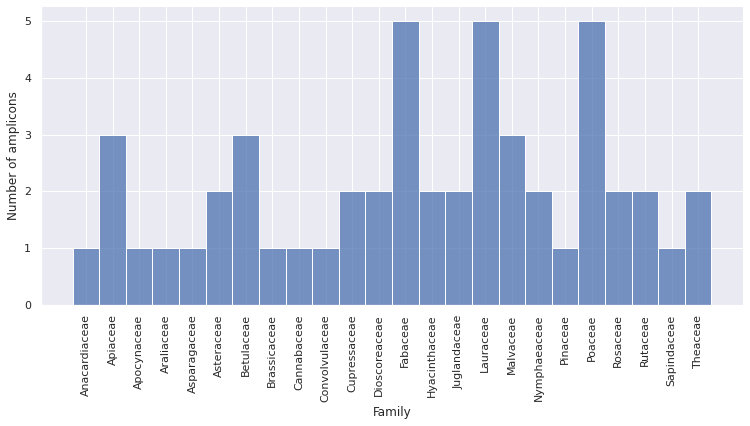

In [38]:
# Import the necessary modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize the lists for X and Y
data = pd.read_csv('target95_trnL_OTU_tax_assignments.txt', sep='\t')

df = pd.DataFrame(data).sort_values('Family')

# distribution (histogram) based on column 2 from file
dist_plot = sns.displot(df['Family'], bins=15)

# show plot with custom width
dist_plot.fig.set_figwidth(12)
plt.xticks(rotation='vertical')
plt.ylabel("Number of amplicons")

**How about the total count of OTUs?**

<AxesSubplot:xlabel='Family', ylabel='Total OTU count'>

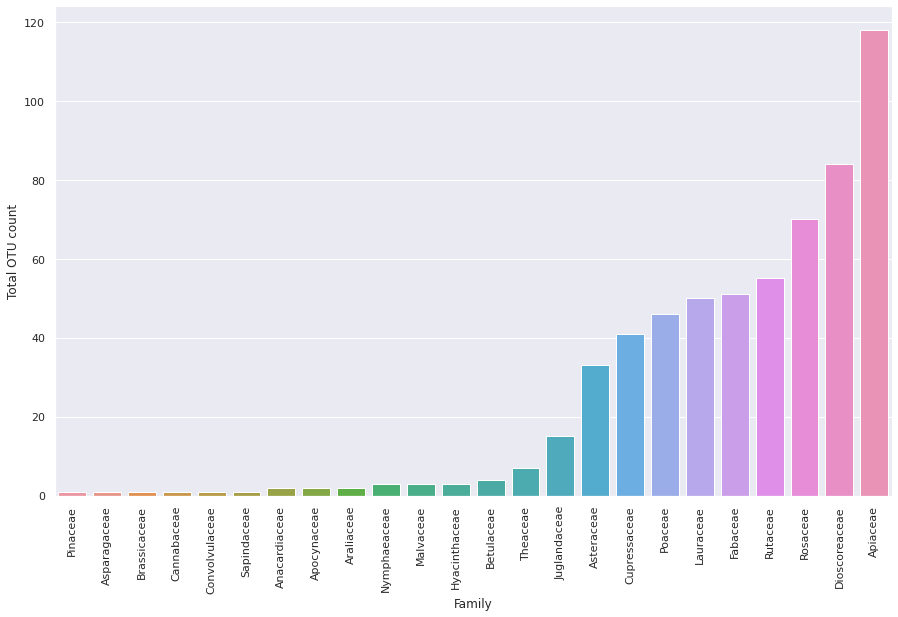

In [160]:
# Import the necessary modules
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Initialize the lists for X and Y
data = pd.read_csv('target95_trnL_OTU_tax_assignments.txt', sep='\t')

df = pd.DataFrame(data).sort_values('Family').groupby(['Family'])

otus_by_family = df['OTU_abundance'].agg([np.sum]).reset_index().sort_values('sum')

# distribution (histogram) based on column 2 from file
bar_plot = sns.barplot(x='Family', y='sum', data=otus_by_family)

# show plot with custom width
sns.set(rc={'figure.figsize':(15,9)})
plt.xticks(rotation='vertical')
plt.ylabel("Total OTU count")
bar_plot

**Now let's create an OTU table of these results?**

In [165]:
 %%bash
./6a_build_OTU_table.sh \
    trnL_cluster_representatives.fas \
    trnL_sub.qual \
    Blast_results_formatted2OTUtable.tab \
    /home/jupyter/METAPIPE_Workshop2021/dereplicated

In [166]:
%ls -t | head

trnL_cluster_OTU_table_complete.tab
metapipe-run.ipynb
6a_build_OTU_table.sh*
Install_Setup.ipynb
target95_trnL_OTU_tax_assignments.txt
Blast_results_formatted2OTUtable.tab
target95_trnL_local_blast.tab
target_trnL.uniq.fasta.ndb
target_trnL.uniq.fasta.nos
target_trnL.uniq.fasta.ntf


In [39]:
get_glimpse_head('trnL_cluster_OTU_table_complete.tab')

,OTU,total,cloud,amplicon,length,abundance,chimera,spread,quality,sequence,...,Paeonialactiflora_a_dp,Paeonialactiflora_b_dp,Peoniasuffruticosa_a_dp,Poriacocos_a_dp,Poriacocos_b_dp,Prunuspersica_a_dp,Prunuspersica_b_dp,Trogopterusxanthipes_a_dp,Trogopterusxanthipes_b_dp,unknown_dp
0,1,87,10,8cdbd592419bf9c65aa2691a6c163fe4c16042bb,52,75,N,7,0.0001,ATCCTGTTTTCCGAAAACAAACACAAAGATTCAGAAAGCAAGAATA...,...,2,4,10,0,0,0,0,0,0,148
1,2,69,23,a84c749701d67d1226018c6714b72e543a618f16,102,44,N,4,0.0001,CTTTTTTTATATAAAAAAAAATTTTATAATATAATAAAAAATTTAG...,...,0,0,0,0,0,0,0,0,8,112
2,3,59,13,addff39eca064dd9caa294721e6a23cab9c331ab,45,47,N,4,0.0001,ATCCTATTTTCCAAAAACAAACAAAGGCCCAGAAGGTGAAAAAAG,...,0,0,0,0,0,0,0,0,0,88
3,4,58,14,967e951648145482fcc47f85b2a3530bec26d552,45,44,N,5,0.0001,CTTTTTTCACCTTCTGGGCCTTTGTTTGTTTTTGGAAAATAGGAT,...,0,0,2,0,0,0,0,0,0,104
4,5,55,12,9cb16aaf5f7887b597ac5fc1bba7e95e881b0d3c,52,44,N,4,0.0001,CTTTTTTATTCTTGCTTTCTGAATCTTTGTGTTTGTTTTCGGAAAA...,...,0,0,0,0,0,0,0,0,0,100
5,6,48,7,c65370ec20a9cdf9089e1983d7c5c3d4227a870b,77,42,N,2,0.0001,ATCTTTATTTGTTTTGTTTTTTATAAACCCTTTGGTTTATAAAAAA...,...,0,0,0,0,0,0,0,0,0,90
6,7,47,17,915b299b3e7e35a13fcc354b7bf2c72ba1c330fc,102,30,N,2,0.0001,ATCATTATTTTGAAAAAATATAAAAAAATATATAATATATATAGAA...,...,0,0,0,0,0,0,0,0,0,92
7,8,36,11,94385ff6f775ede0a8b76f5e4f3a9a0de58a4eca,77,25,N,2,0.0001,CTTTTTGATTTTTGATTCTAGTTTGTTTTGTTTTTTTATAAACCAA...,...,0,2,0,0,0,0,0,0,0,70
8,9,36,6,51f5ee433d9bd7bcab7dd619b067cac228be8d5d,51,31,N,4,0.0001,CTTTTTTATTCTCGGTTTATGAAACCCTTGTTTGTTTTAATAAAAC...,...,0,2,0,0,0,0,0,4,0,64
9,10,34,5,28bf85082548d49c8d3b2793064a2fae0f417562,51,30,N,4,0.0001,ATCCTGTTTTATTAAAACAAACAAGGGTTTCATAAACCGAGAATAA...,...,0,0,0,0,0,6,10,0,0,50


**The results have plenty of missing data and low quality entries. Let's pass a filter on it?**

In [169]:
%%bash 
./6b_filter_OTU_table.sh \
    trnL_cluster_OTU_table_complete.tab \
    trnL_sub.qual

In [170]:
%ls -t | head -20

metapipe-run.ipynb
trnL_cluster_OTU_table_f4_no_hit2_cut2phyloseq2.tab
trnL_sub.ee
trnL_cluster_OTU_table_f3_hits_only2_cut2phyloseq2.tab
trnL_cluster_OTU_table_f4_no_hit2.tab
trnL_cluster_OTU_table_f2_97up2_cut2phyloseq2.tab
trnL_cluster_OTU_table_f3_hits_only2.tab
trnL_cluster_OTU_table_f1_basics2_cut2phyloseq2.tab
trnL_cluster_OTU_table_f2_97up2.tab
trnL_cluster_OTU_table_f1_basics2.tab
trnL_cluster_OTU_table_complete.tab
6a_build_OTU_table.sh*
Install_Setup.ipynb
target95_trnL_OTU_tax_assignments.txt
Blast_results_formatted2OTUtable.tab
target95_trnL_local_blast.tab
target_trnL.uniq.fasta.ndb
target_trnL.uniq.fasta.nos
target_trnL.uniq.fasta.ntf
target_trnL.uniq.fasta.nto


**Let's recheck our data**

In [40]:
get_glimpse_head('trnL_cluster_OTU_table_f1_basics2_cut2phyloseq2.tab')

,amplicon,*,Angelicaesinensis_a,Angelicaesinensis_b,Carthamustinctorius_a,Carthamustinctorius_b,Citrusaurantium_a,Citrusaurantium_b,Cyperusrotundus_a,Cyperusrotundus_b,...,Paeonialactiflora_a,Paeonialactiflora_b,Peoniasuffruticosa_a,Poriacocos_a,Poriacocos_b,Prunuspersica_a,Prunuspersica_b,Trogopterusxanthipes_a,Trogopterusxanthipes_b,unknown
0,8cdbd592419bf9c65aa2691a6c163fe4c16042bb,0,0,0,0,0,0,0,0,0,...,2,4,10,0,0,0,0,0,0,148
1,a84c749701d67d1226018c6714b72e543a618f16,0,0,6,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,112
2,addff39eca064dd9caa294721e6a23cab9c331ab,0,16,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,88
3,967e951648145482fcc47f85b2a3530bec26d552,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,104
4,9cb16aaf5f7887b597ac5fc1bba7e95e881b0d3c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100
5,c65370ec20a9cdf9089e1983d7c5c3d4227a870b,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,90
6,915b299b3e7e35a13fcc354b7bf2c72ba1c330fc,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,92
7,94385ff6f775ede0a8b76f5e4f3a9a0de58a4eca,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,70
8,51f5ee433d9bd7bcab7dd619b067cac228be8d5d,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,4,0,64
9,28bf85082548d49c8d3b2793064a2fae0f417562,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,6,10,0,0,50


**Let's use some metadata to have more information on the data?**

In [41]:
get_glimpse_head('trnL_sub_metadata.txt')

,SampleID,SampleName,Replicate,Experiment,Exp_fam,Exp_genus
0,Angelicaesinensis_a,Angelicaesinensis_a,Angelicaesinensis,Exp1,Apiaceae,Angelica
1,Angelicaesinensis_b,Angelicaesinensis_b,Angelicaesinensis,Exp1,Apiaceae,Angelica
2,Carthamustinctorius_a,Carthamustinctorius_a,Carthamustinctorius,Exp2,Asteraceae,Carthamus
3,Carthamustinctorius_b,Carthamustinctorius_b,Carthamustinctorius,Exp2,Asteraceae,Carthamus
4,Citrusaurantium_a,Citrusaurantium_a,Citrusaurantium,Exp3,Rutaceae,Citrus
5,Citrusaurantium_b,Citrusaurantium_b,Citrusaurantium,Exp3,Rutaceae,Citrus
6,Cyperusrotundus_a,Cyperusrotundus_a,Cyperusrotundus,Exp4,Cypereae,Cyperus
7,Cyperusrotundus_b,Cyperusrotundus_b,Cyperusrotundus,Exp4,Cypereae,Cyperus
8,Glycyrrhizauralensis_a,Glycyrrhizauralensis_a,Glycyrrhizauralensis,Exp5,Fabaceae,Glycyrrhiza
9,Glycyrrhizauralensis_b,Glycyrrhizauralensis_b,Glycyrrhizauralensis,Exp5,Fabaceae,Glycyrrhiza


**Let's save these files on our GCP Storage**

In [175]:
!gsutil cp trnL_sub_metadata.txt gs://metapipe-files

Copying file://trnL_sub_metadata.txt [Content-Type=text/plain]...
/ [1 files][  2.6 KiB/  2.6 KiB]                                                
Operation completed over 1 objects/2.6 KiB.                                      


In [176]:
!gsutil cp trnL_cluster_OTU_table_f* gs://metapipe-files

Copying file://trnL_cluster_OTU_table_f1_basics2.tab [Content-Type=application/octet-stream]...
Copying file://trnL_cluster_OTU_table_f1_basics2_cut2phyloseq2.tab [Content-Type=application/octet-stream]...
Copying file://trnL_cluster_OTU_table_f2_97up2.tab [Content-Type=application/octet-stream]...
Copying file://trnL_cluster_OTU_table_f2_97up2_cut2phyloseq2.tab [Content-Type=application/octet-stream]...
- [4 files][ 25.4 KiB/ 25.4 KiB]                                                
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying file://trnL_cluster_OTU_table_f3_hits_only2.tab [Content-Type=application/octet-stream]...
Copying file://trnL_cluster_OTU_table_f3_hits_only2_cut2phyloseq2.tab [Content-Type=application/octet-stream]...
Copying file://trnL_cluster_OTU_table_f4_no_hit

https://console.cloud.google.com/marketplace/product/rstudio-launcher-public/rstudio-server-pro-standard-for-gcp?q=rstudio&id=76ae9647-2d08-4888-b737-74f751581848&project=metapipe

In [177]:
!gsutil cp target95_trnL_OTU_tax_assignments.txt gs://metapipe-files

Copying file://target95_trnL_OTU_tax_assignments.txt [Content-Type=text/plain]...
/ [1 files][  6.3 KiB/  6.3 KiB]                                                
Operation completed over 1 objects/6.3 KiB.                                      


**How our final resulting file looks like?**

In [178]:
!grep "Dioscoreaceae" target95_trnL_OTU_tax_assignments.txt

c65370ec20a9cdf9089e1983d7c5c3d4227a870b	Eukaryota	Streptophyta	Magnoliopsida	Dioscoreales	Dioscoreaceae	Dioscorea	japonica	100.000	48
94385ff6f775ede0a8b76f5e4f3a9a0de58a4eca	Eukaryota	Streptophyta	Magnoliopsida	Dioscoreales	Dioscoreaceae	Dioscorea	japonica	100.000	36


**Now let's visualise the distribution of OTU abundance for each selected amplicon. For that, we must create a function to make things easier:**

In [42]:
def plot_OTU_bars(amplicon, assignments, nbins, width):
    # Import the necessary modules
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns
    import pandas as pd
    
    # import data
    data = pd.read_csv(assignments, sep='\t')
    
    # apply filter
    selection = pd.DataFrame(data).amplicon.str.contains(amplicon)
    df = data[selection].set_index('amplicon').T
    df.reset_index(inplace=True)
    
    # create barplot
    bar_plot = sns.barplot(x='index', y=str(amplicon), data=df)

    # show plot with custom width
    sns.set(rc={'figure.figsize':(width,9)})
    plt.xticks(rotation='vertical')
    plt.ylabel("Abundance")
    plt.xlabel("Sample")
    bar_plot

    # return results
    return bar_plot

**Let's check the Top6 OTUs from the whole dataset:**

In [236]:
!grep "ac90db76fbae68003ec939d36b9847a46cbfa3c7" target95_trnL_OTU_tax_assignments.txt

ac90db76fbae68003ec939d36b9847a46cbfa3c7	Eukaryota	Streptophyta	Magnoliopsida	Sapindales	Rutaceae	Citrus	micrantha	100.000	26


<AxesSubplot:xlabel='Sample', ylabel='Abundance'>

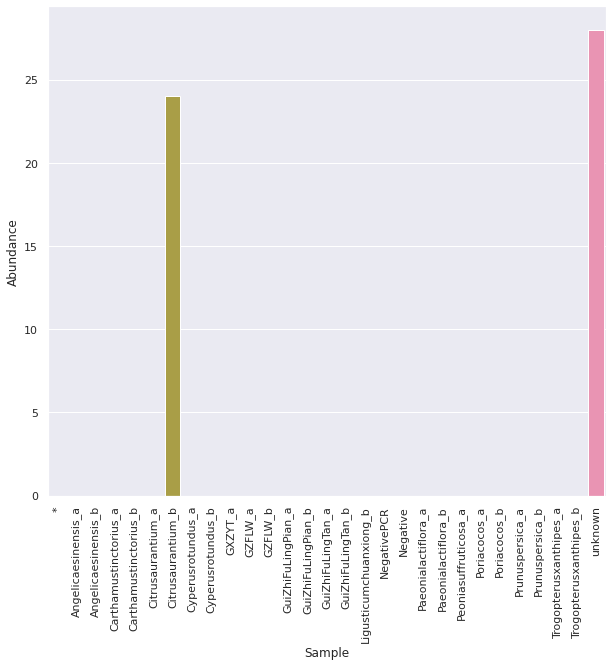

In [43]:
plot_OTU_bars(
    "ac90db76fbae68003ec939d36b9847a46cbfa3c7", 
    "trnL_cluster_OTU_table_f1_basics2_cut2phyloseq2.tab", 
    15,  # number of bins (bars)
    10)  # width

**We observe that Rutaceae Citrus micrantha is more abundant in Citrusaurantium_b sample.**

In [240]:
!grep "2987db85c9fae5a1464f814e070b7507621e8a57" target95_trnL_OTU_tax_assignments.txt

2987db85c9fae5a1464f814e070b7507621e8a57	Eukaryota	Streptophyta	Magnoliopsida	Poales	Poaceae	Zea	mays	100.000	23


<AxesSubplot:xlabel='index', ylabel='Abundance'>

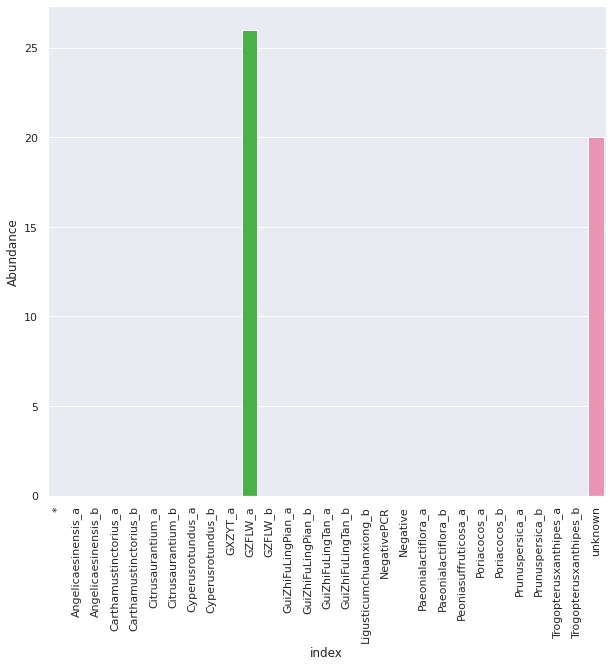

In [241]:
plot_OTU_bars(
    "2987db85c9fae5a1464f814e070b7507621e8a57", 
    "trnL_cluster_OTU_table_f1_basics2_cut2phyloseq2.tab", 
    15,  # number of bins (bars)
    10)  # width

**We observe that Poaceae Zea mays is more abundant in GZFLW_a sample.**

In [242]:
!grep "addff39eca064dd9caa294721e6a23cab9c331ab" target95_trnL_OTU_tax_assignments.txt

addff39eca064dd9caa294721e6a23cab9c331ab	Eukaryota	Streptophyta	Magnoliopsida	Apiales	Apiaceae	Selinum	carvifolia	100.000	59


<AxesSubplot:xlabel='index', ylabel='Abundance'>

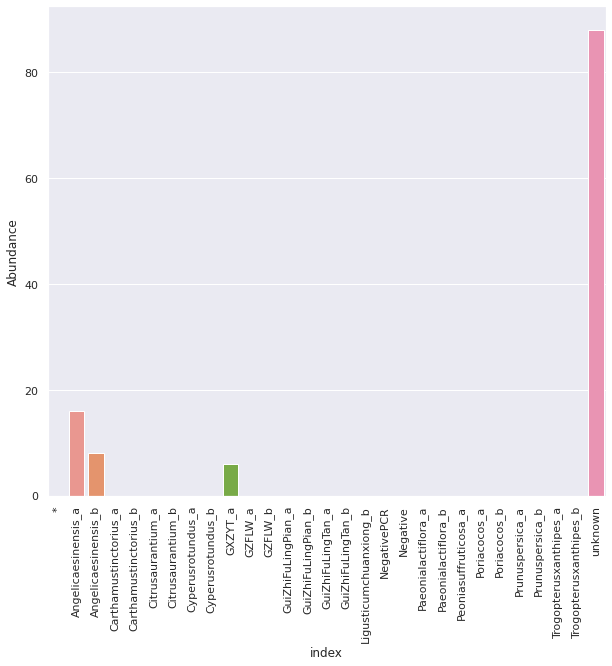

In [243]:
plot_OTU_bars(
    "addff39eca064dd9caa294721e6a23cab9c331ab", 
    "trnL_cluster_OTU_table_f1_basics2_cut2phyloseq2.tab", 
    15,  # number of bins (bars)
    10)  # width

**We observe that Apiaceae Selinum carvifolia is more abundant in Angelicaesinensis_a sample.**

In [244]:
!grep "a069993ab97b3f720cf66567bfb1fad838b20dc6" target95_trnL_OTU_tax_assignments.txt

a069993ab97b3f720cf66567bfb1fad838b20dc6	Eukaryota	Streptophyta	Magnoliopsida	Laurales	Lauraceae	Cinnamomum	camphora	100.000	11


<AxesSubplot:xlabel='index', ylabel='Abundance'>

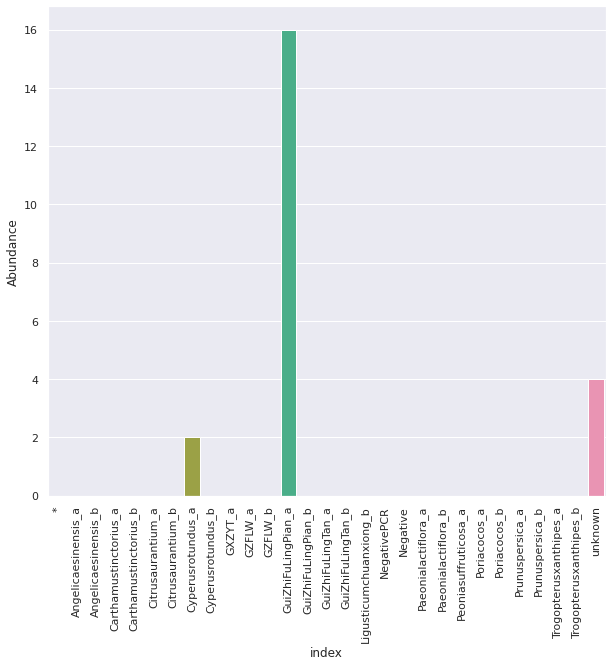

In [245]:
plot_OTU_bars(
    "a069993ab97b3f720cf66567bfb1fad838b20dc6", 
    "trnL_cluster_OTU_table_f1_basics2_cut2phyloseq2.tab", 
    15,  # number of bins (bars)
    10)  # width

**We observe that Lauraceae Cinnamomum camphora is more abundant in Cyperusrotundus_a sample.**

> Aqui acredito que você escreveu errado a amostra

In [90]:
!grep "28bf85082548d49c8d3b2793064a2fae0f417562" target95_trnL_OTU_tax_assignments.txt

28bf85082548d49c8d3b2793064a2fae0f417562	Eukaryota	Streptophyta	Magnoliopsida	Rosales	Rosaceae	Prunus	sunhangii	100.000	34741


<AxesSubplot:xlabel='index', ylabel='Abundance'>

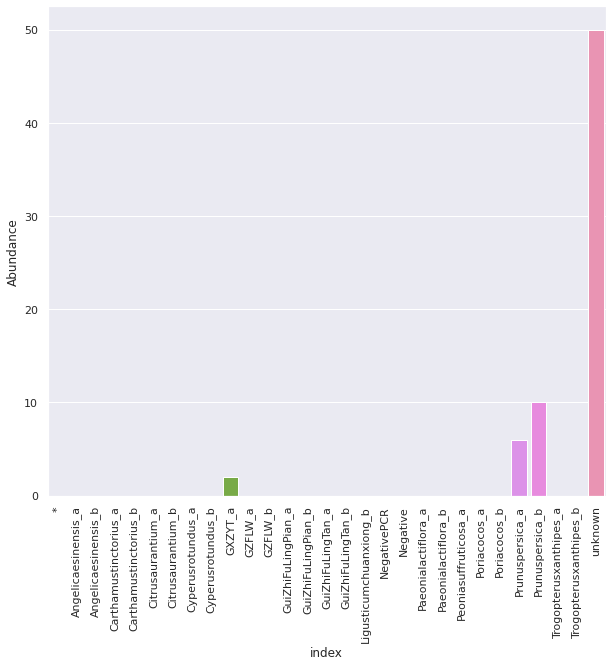

In [246]:
plot_OTU_bars(
    "28bf85082548d49c8d3b2793064a2fae0f417562", 
    "trnL_cluster_OTU_table_f1_basics2_cut2phyloseq2.tab", 
    15,  # number of bins (bars)
    10)  # width

**We observe that Rosaceae Prunus sunhangii is more abundant in Prunuspersica_b sample.**

In [91]:
!grep "967e951648145482fcc47f85b2a3530bec26d552" target95_trnL_OTU_tax_assignments.txt

967e951648145482fcc47f85b2a3530bec26d552	Eukaryota	Streptophyta	Magnoliopsida	Apiales	Apiaceae	Selinum	carvifolia	100.000	33003


<AxesSubplot:xlabel='index', ylabel='Abundance'>

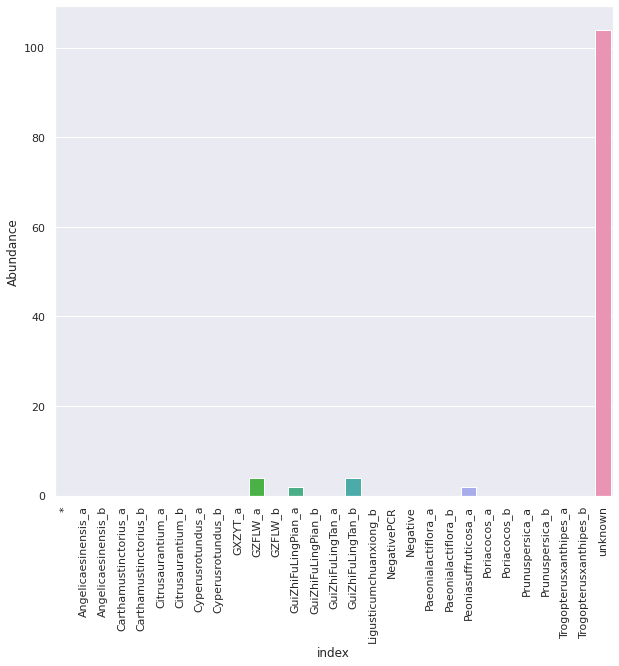

In [247]:
plot_OTU_bars(
    "967e951648145482fcc47f85b2a3530bec26d552", 
    "trnL_cluster_OTU_table_f1_basics2_cut2phyloseq2.tab", 
    15,  # number of bins (bars)
    10)  # width

**We observe that Apiaceae Selinum carvifolia is more abundant in GuiZhiFuLingTan_b sample.**


Check the top4 OTUs from data_clean dataset

In [82]:
!grep "9319dccb21d181d5ff01c4d084ace1f2bf1d9f87" target95_trnL_OTU_tax_assignments.txt

9319dccb21d181d5ff01c4d084ace1f2bf1d9f87	Eukaryota	Streptophyta	Magnoliopsida	Poales	Poaceae	Campeiostachys	calcicola	100.000	11136


In [46]:
!grep "9319dccb21d181d5ff01c4d084ace1f2bf1d9f87" trnL_cluster_OTU_table_f1_basics2_cut2phyloseq2.tab

> Aqui tem um problema marcele, esse tag não existe no arquivo!!

We observe that Poaceae Campeiostachys calcicola is more abundant in GuiZhiFuLingTan_a sample.

In [83]:
!grep "d9e0449e3f64c10837e21c2f3fb744969044482d" target95_trnL_OTU_tax_assignments.txt

d9e0449e3f64c10837e21c2f3fb744969044482d	Eukaryota	Streptophyta	Magnoliopsida	Poales	Poaceae	Campeiostachys	calcicola	100.000	13459


In [47]:
!grep "d9e0449e3f64c10837e21c2f3fb744969044482d" trnL_cluster_OTU_table_f1_basics2_cut2phyloseq2.tab

> Tag não aparece no arquivo

We observe that Poaceae Campeiostachys calcicola is also more abundant in Cyperusrotundus_a sample.

In [84]:
!grep "785131f35679fb33afaedf6919f8ec30539638bc" target95_trnL_OTU_tax_assignments.txt

785131f35679fb33afaedf6919f8ec30539638bc	Eukaryota	Streptophyta	Pinopsida	NA	Cupressaceae	Thuja	sp.	100.000	13999


<AxesSubplot:xlabel='Sample', ylabel='Abundance'>

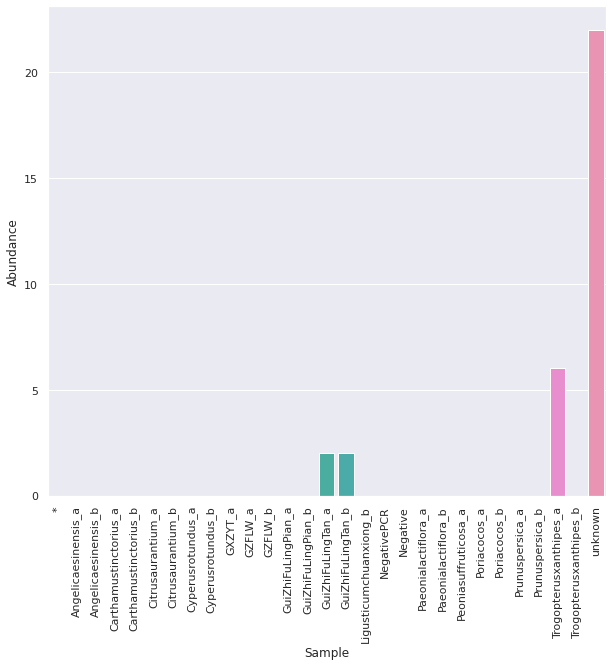

In [49]:
plot_OTU_bars(
    "785131f35679fb33afaedf6919f8ec30539638bc", 
    "trnL_cluster_OTU_table_f1_basics2_cut2phyloseq2.tab", 
    15,  # number of bins (bars)
    10)  # width

**We observe that Cupressaceae Thuja sp. is more abundant in Trogopterusxanthipes_a sample.**

In [112]:
!grep "a069993ab97b3f720cf66567bfb1fad838b20dc6" target95_trnL_OTU_tax_assignments.txt

a069993ab97b3f720cf66567bfb1fad838b20dc6	Eukaryota	Streptophyta	Magnoliopsida	Laurales	Lauraceae	Cinnamomum	camphora	100.000	37670


<AxesSubplot:xlabel='Sample', ylabel='Abundance'>

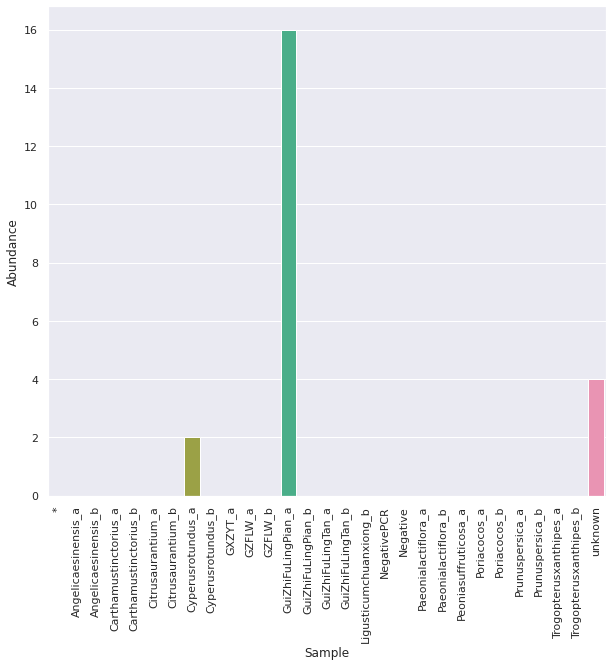

In [51]:
plot_OTU_bars(
    "a069993ab97b3f720cf66567bfb1fad838b20dc6", 
    "trnL_cluster_OTU_table_f1_basics2_cut2phyloseq2.tab", 
    15,  # number of bins (bars)
    10)  # width

**We observe that Lauraceae Cinnamomum camphorais more abundant in GuiZhiFuLingPian_a sample**